POPULARITY BASED 

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
mr=pd.read_csv('movies.csv')
rr=pd.read_csv('ratings.csv')

In [162]:
mr.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [163]:
rr.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [164]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [165]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [166]:
pr=rr.merge(mr,on="movieId")
pr.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [167]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [168]:
pr.shape

(105339, 6)

In [169]:
pr.drop_duplicates(inplace=True)
pr.shape

(105339, 6)

In [170]:
pr.corr()

C:\Users\sarmi\AppData\Local\Temp\ipykernel_10020\1611933941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pr.corr()


,userId,movieId,rating,timestamp
userId,1.000000,0.089403,-0.044781,0.039862
movieId,0.089403,1.000000,-0.025446,0.518283
rating,-0.044781,-0.025446,1.000000,0.002697
timestamp,0.039862,0.518283,0.002697,1.000000


In [171]:
num_df=pr.groupby('title').count()['rating'].reset_index()
num_df.rename(columns={'rating':'no_rating'},inplace=True)
num_df

,title,no_rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",20
...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),1
10319,xXx (2002),24
10320,xXx: State of the Union (2005),7
10321,¡Three Amigos! (1986),40


In [172]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.lineplot(x=num_df['title'],y=num_df['no_rating'])
# plt.show()

In [173]:
avg_df=pr.groupby('title').mean()['rating'].reset_index()
avg_df.rename(columns={'rating':'avg_rating'},inplace=True)
avg_df

C:\Users\sarmi\AppData\Local\Temp\ipykernel_10020\2477097475.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df=pr.groupby('title').mean()['rating'].reset_index()


,title,avg_rating
0,'71 (2014),3.500000
1,'Hellboy': The Seeds of Creation (2004),3.000000
2,'Round Midnight (1986),2.500000
3,'Til There Was You (1997),4.000000
4,"'burbs, The (1989)",3.125000
...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),4.500000
10319,xXx (2002),2.958333
10320,xXx: State of the Union (2005),2.071429
10321,¡Three Amigos! (1986),3.012500


In [174]:
pop_df=num_df.merge(avg_df,on='title')
pop_df

,title,no_rating,avg_rating
0,'71 (2014),1,3.500000
1,'Hellboy': The Seeds of Creation (2004),1,3.000000
2,'Round Midnight (1986),1,2.500000
3,'Til There Was You (1997),3,4.000000
4,"'burbs, The (1989)",20,3.125000
...,...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),1,4.500000
10319,xXx (2002),24,2.958333
10320,xXx: State of the Union (2005),7,2.071429
10321,¡Three Amigos! (1986),40,3.012500


(array([9.543e+03, 4.680e+02, 1.560e+02, 7.700e+01, 3.400e+01, 1.700e+01,
        1.400e+01, 7.000e+00, 3.000e+00, 4.000e+00]),
 array([  1. ,  33.4,  65.8,  98.2, 130.6, 163. , 195.4, 227.8, 260.2,
        292.6, 325. ]),
 <BarContainer object of 10 artists>)

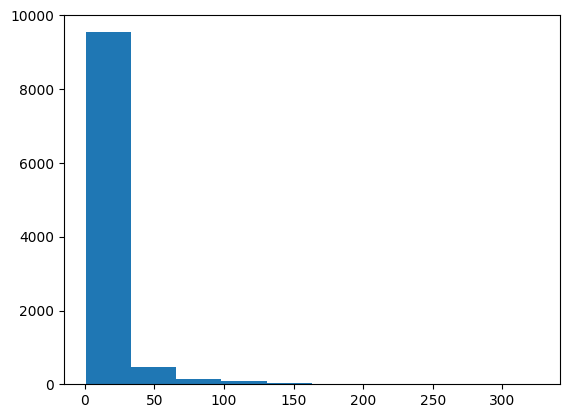

In [175]:
plt.hist(pop_df['no_rating'])

In [176]:
pop_df.no_rating.max() # max no. of rating in a movie

325

In [177]:
pop_df.no_rating.min() # min no. of rating in a movie

1

In [178]:
print("Mean:",pop_df.no_rating.mean())
print("Median:",pop_df.no_rating.median())
print("Mode:",pop_df.no_rating.mode())

Mean: 10.204301075268818
Median: 3.0
Mode: 0    1
Name: no_rating, dtype: int64


In [179]:
pop_df=pop_df[pop_df['no_rating']>=10].sort_values('avg_rating',ascending=False).head(100)

In [180]:
pop_df

,title,no_rating,avg_rating
6937,Paths of Glory (1957),19,4.500000
5134,Kundun (1997),10,4.500000
353,All Quiet on the Western Front (1930),13,4.500000
6408,Nausicaä of the Valley of the Wind (Kaze no ta...,22,4.477273
9363,Touch of Evil (1958),21,4.476190
...,...,...,...
4585,Inception (2010),103,4.189320
8585,Star Wars: Episode IV - A New Hope (1977),273,4.188645
3185,Fight Club (1999),207,4.188406
5119,Kolya (Kolja) (1996),16,4.187500


In [181]:
pop_df=pop_df.merge(pr,on='title').drop(['userId','movieId','timestamp','rating','no_rating'],axis=1).drop_duplicates()

In [182]:
pop_df

,title,avg_rating,genres
0,Paths of Glory (1957),4.500000,Drama|War
19,Kundun (1997),4.500000,Drama
29,All Quiet on the Western Front (1930),4.500000,Action|Drama|War
42,Nausicaä of the Valley of the Wind (Kaze no ta...,4.477273,Adventure|Animation|Drama|Fantasy|Sci-Fi
64,Touch of Evil (1958),4.476190,Crime|Film-Noir|Thriller
...,...,...,...
5108,Inception (2010),4.189320,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
5211,Star Wars: Episode IV - A New Hope (1977),4.188645,Action|Adventure|Sci-Fi
5484,Fight Club (1999),4.188406,Action|Crime|Drama|Thriller
5691,Kolya (Kolja) (1996),4.187500,Comedy|Drama


In [183]:
import pickle
pickle.dump(pop_df,open('pop.pkl','wb'))